In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization, AveragePooling2D, Concatenate, GlobalAveragePooling2D, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Basics of Tensorflow

In [2]:
hello = tf.constant('Hello World')
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [3]:
x = tf.constant(100)
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [0]:
sess = tf.Session()

In [6]:
sess.run([hello, x])

[b'Hello World', 100]

In [8]:
x = tf.constant(2)
y = tf.constant(10)

with tf.Session() as sess:
    print(f"Addition: {sess.run(x+y)}")
    print(f"Subtraction: {sess.run(x-y)}")
    print(f"Multiplication: {sess.run(x*y)}")
    print(f"Division: {sess.run(x/y)}")

Addition: 12
Subtraction: -8
Multiplication: 20
Division: 0.2


In [12]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

add = tf.add(x, y)
sub = tf.subtract(x, y)
mul = tf.multiply(x, y)
div = tf.divide(x, y)

with tf.Session() as sess:
    print(f"Addition: {sess.run(add, feed_dict={x:2, y:10})}")
    print(f"Subtraction: {sess.run(sub, feed_dict={x:2, y:10})}")
    print(f"Multiplication: {sess.run(mul, feed_dict={x:2, y:10})}")
    print(f"Division: {sess.run(div, feed_dict={x:2, y:10})}")

Addition: 12
Subtraction: -8
Multiplication: 20
Division: 0.2


In [13]:
a = np.array([[5.0, 5.0]])
b = np.array([[2.0], [2.0]])

mat1 = tf.constant(a)
mat2 = tf.constant(b)
mat_mul = tf.matmul(mat1, mat2)

with tf.Session() as sess:
    print(f"Matrix Multiplication: {sess.run(mat_mul)}")

Matrix Multiplication: [[20.]]


In [16]:
mnist = input_data.read_data_sets('mnist_data', one_hot=True)
type(mnist)

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [20]:
print(mnist.train.images)
print(mnist.train.num_examples)
print(mnist.test.num_examples)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
55000
10000


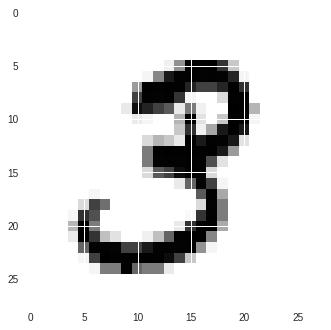

In [24]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [27]:
x = tf.placeholder(tf.float32, shape=[None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y_pred = tf.matmul(x, W) + b
y_true = tf.placeholder(tf.float32, shape=[None, 10])

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(f"Accuracy: {sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels})}")

Accuracy: 0.9207000136375427


# Working with MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


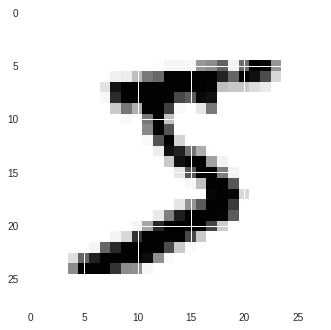

In [0]:
img_size = x_train.shape[1]
flat_img_size = img_size * img_size
channels = 1
num_classes = 10

print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[0])

In [0]:
# onehot_y_train = np.zeros((y_train.shape[0], num_classes))
# onehot_y_test = np.zeros((y_test.shape[0], num_classes))

# for i in range(y_train.shape[0]):
#     onehot_y_train[i][y_train[i]] = 1
    
# for i in range(y_test.shape[0]):
#     onehot_y_test[i][y_test[i]] = 1

In [0]:
train_mod = np.zeros((x_train.shape[0], flat_img_size))
test_mod = np.zeros((x_test.shape[0], flat_img_size))

for i in range(x_train.shape[0]):
    train_mod[i] = x_train[i].flatten()

for i in range(x_test.shape[0]):
    test_mod[i] = x_test[i].flatten()

In [0]:
def get_batch(batch_size=128):
    random_indices = np.random.randint(low=0, high=x_train.shape[0], size=batch_size)
    random_img = np.array([train_mod[i] for i in random_indices], dtype=np.float32)
    random_label = np.array([y_train[i]+1 for i in random_indices], dtype=np.int64).reshape(-1, 1)
    return random_img, random_label

# Native TF Code

In [0]:
%%time

batch_size = 64
epochs = 50

x = tf.placeholder(tf.float32, [None, flat_img_size])
y_true = tf.placeholder(tf.int64, [None, 1])

weights = tf.Variable(tf.zeros([flat_img_size, 10]))
biases = tf.Variable(tf.zeros([10]))

logits = tf.add(tf.matmul(x, weights), biases)
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                    labels=y_true))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

preds = tf.equal(y_pred_cls, y_true)
accuracy = tf.reduce_mean(tf.cast(preds, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        for _ in range(int(x_train.shape[0] / batch_size)):
            x_batch, y_batch = get_batch(batch_size)
            _, acc, loss = sess.run([optimizer, accuracy, cost], {x: x_batch, y_true: y_batch})
        
        print(f"Epoch {i} ===> Accuracy: {acc}, Loss: {loss}")

In [0]:
%%time

# Initialize Placeholders
x = tf.placeholder(tf.float32, [None, 28, 28])
y = tf.placeholder(tf.int32, [None, 1])

# Flatten the Image data
flat_img = tf.layers.flatten(x)

# Feed to a Dense Layer
logits = tf.contrib.layers.fully_connected(flat_img, 128, activation_fn=tf.nn.relu)

# Define a Loss Function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, 
                                                                logits=logits))

# Define an Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to Label Indices
correct_pred = tf.argmax(logits, axis=1)

# Define an Accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

tf.set_random_seed(42)
epochs = 100

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        _, acc_value, loss_value = sess.run([optimizer, accuracy, loss], feed_dict={x: x_train, y: y_train.reshape(-1, 1)})
        if i % 10 == 0:
            print(f"Epoch-{i} ===> Loss: {loss_value}, Accuracy: {acc_value}")

# Keras Sequential API - ANN

In [0]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3, verbose=0)
results = model.evaluate(x_test, y_test)

for i, j in zip(model.metrics_names, results):
    print(f"{i}: {j}")

save_model(model, 'ann_model')

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0786 - sparse_categorical_accuracy: 0.9783
loss: 0.07856610854162427
sparse_categorical_accuracy: 0.9782999753952026
CPU times: user 53.4 s, sys: 5.64 s, total: 59 s
Wall time: 44 s


# Keras Sequential API - CNN

In [0]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=36, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_split=0.3, verbose=0)

results = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
for i, j in zip(model.metrics_names, results):
    print(f"{i}: {j}")
    
save_model(model, 'cnn_model')

10000/10000 [==============================] - 1s 90us/sample - loss: 0.0351 - sparse_categorical_accuracy: 0.9908
loss: 0.03507390564493762
sparse_categorical_accuracy: 0.9908000230789185
CPU times: user 1min 5s, sys: 8.27 s, total: 1min 13s
Wall time: 58.2 s


In [0]:
!ls

ann_model  cnn_model  sample_data


# Functional Keras Model

In [0]:
# The shape Input to this layer will not include the batch size, only the image size and the channel - in this case (28 x 28 x 1)
inputs = Input(shape=(img_size, img_size, 1))

conv1 = Conv2D(filters=16, kernel_size=5, strides=1, padding='same', data_format='channels_last', activation='relu', kernel_initializer='glorot_normal')(inputs)
maxp1 = MaxPool2D(pool_size=2, strides=1, padding='valid')(conv1)

conv2 = Conv2D(filters=36, kernel_size=5, strides=1, padding='same', data_format='channels_last', activation='relu', kernel_initializer='glorot_normal')(maxp1)
maxp2 = MaxPool2D(pool_size=2, strides=1, padding='valid')(conv2)

flat = Flatten()(maxp2)
dense_out = Dense(256, activation='relu', kernel_initializer='he_normal')(flat)

outputs = Dense(10, activation='softmax')(dense_out)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.fit(x_train.reshape(-1, img_size, img_size, channels), y_train, epochs=10, batch_size=64, validation_split=0.3, verbose=0)

results = model.evaluate(x_test.reshape(-1, img_size, img_size, 1), y_test)
for i, j in zip(model.metrics_names, results):
    print(f"{i}: {j}")

10000/10000 [==============================] - 1s 104us/sample - loss: 0.0411 - sparse_categorical_accuracy: 0.9906
loss: 0.04111253512892363
sparse_categorical_accuracy: 0.9905999898910522


# Ensemble Learning - Neural Nets

In [0]:
%%time
# Basically the ANN & CNN models created and saved above. These models are loaded in memory and are used to predict the test data.
# The final predictions are calculated using the mean of the two models. sklearn's Accuracy is used to evaluate the final accuracy of the ensemble.

ensemble_preds = np.zeros(shape=(x_test.shape[0], num_classes))
for model in ['ann_model', 'cnn_model']:
    nw_model = load_model(model)
    preds = nw_model.predict(x_test.reshape(-1, img_size, img_size, 1))
    ensemble_preds += preds
    
ensemble_preds /= 2
final_pred_cls = np.argmax(ensemble_preds, axis=1)
print(f"Ensemble Accuracy: {accuracy_score(y_test, final_pred_cls)}")

Ensemble Accuracy: 0.9907
CPU times: user 5.13 s, sys: 178 ms, total: 5.31 s
Wall time: 4.98 s


# CIFAR-10 Classification using CNN

In [0]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [0]:
# print(plt.imshow(x_train[1]))
# print(x_train.shape)

num_classes = 10
img_size = 32
channels = 3

In [0]:
# Model building

inputs = Input(shape=(img_size, img_size, channels))
x = inputs

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPool2D(pool_size=2, strides=1, padding='valid')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPool2D(pool_size=2, strides=1, padding='valid')(x)

x = Flatten()(x)

x = Dense(units=256, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

x = Dense(units=64, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

outputs = Dense(units=10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               803072    
__________

In [0]:
%%time

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=64, seed=42), 
                    epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
782/782 [==============================] - 29s 37ms/step - loss: 1.1389 - sparse_categorical_accuracy: 0.6109 - val_loss: 0.9318 - val_sparse_categorical_accuracy: 0.6759
Epoch 2/25
782/782 [==============================] - 29s 37ms/step - loss: 1.1216 - sparse_categorical_accuracy: 0.6172 - val_loss: 0.9130 - val_sparse_categorical_accuracy: 0.6809
Epoch 3/25
782/782 [==============================] - 29s 37ms/step - loss: 1.1021 - sparse_categorical_accuracy: 0.6250 - val_loss: 0.9003 - val_sparse_categorical_accuracy: 0.6848
Epoch 4/25
782/782 [==============================] - 29s 37ms/step - loss: 1.0899 - sparse_categorical_accuracy: 0.6310 - val_loss: 0.9662 - val_sparse_categorical_accuracy: 0.6650
Epoch 5/25
782/782 [==============================] - 29s 37ms/step - loss: 1.0843 - sparse_categorical_accuracy: 0.6311 - val_loss: 0.9517 - val_sparse_categorical_accuracy: 0.6713
Epoch 6/25
782/782 [==============================] - 29s 38ms/step - loss: 1.0733 - spars

# Building an Inception Network using Functional API
[Inception V3 Research Paper](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Szegedy_Rethinking_the_Inception_CVPR_2016_paper.pdf)

![Inception N/W Architecture](https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwj90sPrkeDgAhWQeysKHZ3tBw4QjRx6BAgBEAU&url=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F41473397%2Fhow-to-obtain-information-on-tensorflow-architecture&psig=AOvVaw2d_5hJEc5I5C-ts1io4Hjw&ust=1551500200524165)

In [0]:
inputs = Input(shape=(299, 299, 3))

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='valid', activation='relu')(inputs)
x = BatchNormalization(axis=3, scale=False)(x)    # axis=3 --> Refers to Channels - 3rd position in shape

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization(axis=3, scale=False)(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(axis=3, scale=False)(x)

x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = Conv2D(filters=80, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization(axis=3, scale=False)(x)

x = Conv2D(filters=192, kernel_size=3, strides=2, padding='valid', activation='relu')(x)
x = BatchNormalization(axis=3, scale=False)(x)

x = Conv2D(filters=288, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization(axis=3, scale=False)(x)

x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

# 3 x Inception Layer (Fig. 5 in Paper)
for _ in range(3):
    branch_1x1 = Conv2D(filters=64, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    branch_1x1 = BatchNormalization(axis=3, scale=False)(branch_1x1)

    branch_3x3 = Conv2D(filters=48, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    branch_3x3 = BatchNormalization(axis=3, scale=False)(branch_3x3)
    branch_3x3 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(branch_3x3)
    branch_3x3 = BatchNormalization(axis=3, scale=False)(branch_3x3)

    branch_5x5 = Conv2D(filters=64, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    branch_5x5 = BatchNormalization(axis=3, scale=False)(branch_5x5)
    branch_5x5 = Conv2D(filters=96, kernel_size=3, strides=1, padding='same', activation='relu')(branch_5x5)
    branch_5x5 = BatchNormalization(axis=3, scale=False)(branch_5x5)
    branch_5x5 = Conv2D(filters=96, kernel_size=3, strides=1, padding='same', activation='relu')(branch_5x5)
    branch_5x5 = BatchNormalization(axis=3, scale=False)(branch_5x5)

    branch_pool = AveragePooling2D(pool_size=3, strides=1, padding='same')(x)
    branch_pool = Conv2D(filters=64, kernel_size=1, strides=1, padding='same', activation='relu')(branch_pool)

    x = concatenate([branch_1x1, branch_3x3, branch_5x5, branch_pool], axis=3)
    
# 5 x Inception Layer (Fig. 6 in Paper)
for _ in range(5):
    branch_1x1 = Conv2D(filters=320, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    branch_1x1 = BatchNormalization(axis=3, scale=False)(branch_1x1)

    branch_7x7 = Conv2D(filters=128, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
    branch_7x7 = BatchNormalization(axis=3, scale=False)(branch_7x7)
    branch_7x7 = Conv2D(filters=128, kernel_size=(1, 7), strides=1, padding='same', activation='relu')(branch_7x7)
    branch_7x7 = BatchNormalization(axis=3, scale=False)(branch_7x7)
    branch_7x7 = Conv2D(filters=320, kernel_size=(7, 1), strides=1, padding='same', activation='relu')(branch_7x7)
    branch_7x7 = BatchNormalization(axis=3, scale=False)(branch_7x7)
    
    branch_7x7_dbl = Conv2D(filters=128, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
    branch_7x7_dbl = BatchNormalization(axis=3, scale=False)(branch_7x7_dbl)
    branch_7x7_dbl = Conv2D(filters=128, kernel_size=(1, 7), strides=1, padding='same', activation='relu')(branch_7x7_dbl)
    branch_7x7_dbl = BatchNormalization(axis=3, scale=False)(branch_7x7_dbl)
    branch_7x7_dbl = Conv2D(filters=128, kernel_size=(7, 1), strides=1, padding='same', activation='relu')(branch_7x7_dbl)
    branch_7x7_dbl = BatchNormalization(axis=3, scale=False)(branch_7x7_dbl)
    branch_7x7_dbl = Conv2D(filters=128, kernel_size=(1, 7), strides=1, padding='same', activation='relu')(branch_7x7_dbl)
    branch_7x7_dbl = BatchNormalization(axis=3, scale=False)(branch_7x7_dbl)
    branch_7x7_dbl = Conv2D(filters=320, kernel_size=(7, 1), strides=1, padding='same', activation='relu')(branch_7x7_dbl)
    branch_7x7_dbl = BatchNormalization(axis=3, scale=False)(branch_7x7_dbl)

    branch_pool = AveragePooling2D(pool_size=3, strides=1, padding='same')(x)
    branch_pool = Conv2D(filters=320, kernel_size=1, strides=1, padding='same', activation='relu')(branch_pool)

    x = concatenate([branch_1x1, branch_7x7, branch_7x7_dbl, branch_pool], axis=3)

outputs_2 = x    # Auxilliary Output

# 2 x Inception Layer (Fig. 7 in Paper)
for _ in range(2):
    branch_1x1 = Conv2D(filters=324, kernel_size=1, strides=1, padding='same', activation='relu')(x)
    branch_1x1 = BatchNormalization(axis=3, scale=False)(branch_1x1)

    branch_1 = Conv2D(filters=160, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
    branch_1 = BatchNormalization(axis=3, scale=False)(branch_1)
    
    branch_2 = Conv2D(filters=350, kernel_size=(1, 3), strides=1, padding='same', activation='relu')(branch_1)
    branch_2 = BatchNormalization(axis=3, scale=False)(branch_2)
    branch_3 = Conv2D(filters=350, kernel_size=(3, 1), strides=1, padding='same', activation='relu')(branch_1)
    branch_3 = BatchNormalization(axis=3, scale=False)(branch_3)
    
    branch_4 = Conv2D(filters=160, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
    branch_4 = BatchNormalization(axis=3, scale=False)(branch_4)
    branch_5 = Conv2D(filters=160, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(branch_4)
    branch_5 = BatchNormalization(axis=3, scale=False)(branch_5)
    
    branch_6 = Conv2D(filters=350, kernel_size=(1, 3), strides=1, padding='same', activation='relu')(branch_5)
    branch_6 = BatchNormalization(axis=3, scale=False)(branch_6)
    branch_7 = Conv2D(filters=350, kernel_size=(3, 1), strides=1, padding='same', activation='relu')(branch_5)
    branch_7 = BatchNormalization(axis=3, scale=False)(branch_7)
    
    branch_pool = AveragePooling2D(pool_size=3, strides=1, padding='same')(x)
    branch_pool = Conv2D(filters=324, kernel_size=1, strides=1, padding='same', activation='relu')(branch_pool)

    x = concatenate([branch_1x1, branch_2, branch_3, branch_6, branch_7, branch_pool], axis=3)
    
x = MaxPool2D(pool_size=(8, 8), strides=2, padding='same')(x)
x = Dropout(0.5)(x)
x = Dense(units=1000, activation='softmax')(x)

model = Model(inputs=inputs, outputs=[outputs_2, x])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

print(model.summary())
    

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_348 (Conv2D)             (None, 149, 149, 32) 896         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_312 (Bat (None, 149, 149, 32) 96          conv2d_348[0][0]                 
__________________________________________________________________________________________________
conv2d_349 (Conv2D)             (None, 147, 147, 32) 9248        batch_normalization_v1_312[0][0] 
__________________________________________________________________________________________________
batch_norm

# Transfer Learning using Inception V3 model